In [42]:
import pandas as pd
import re
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
patients=pd.read_csv('patients.csv')
treatment=pd.read_csv('treatments.csv')
adverse=pd.read_csv('adverse_reactions.csv')
treatment_cut=pd.read_csv('treatments_cut.csv')

In [44]:
print(patients.shape)
print(treatment.shape)
print(adverse.shape)
print(treatment_cut.shape)

(503, 14)
(280, 7)
(34, 3)
(70, 7)


In [45]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [46]:
patients.tail()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7
502,503,male,Pat,Gersten,2778 North Avenue,Burr,Nebraska,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,5/3/1954,138.2,71,19.3


In [47]:
patients[patients.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi


In [48]:
patients[patients['address'].duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [49]:
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [50]:
patients[patients['address'].duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


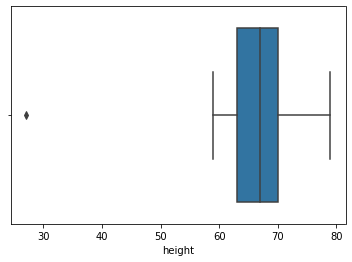

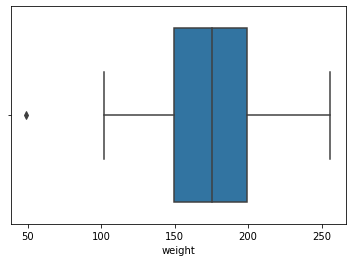

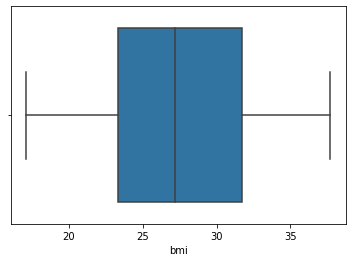

In [51]:
sns.boxplot(patients['height'])
plt.show()
sns.boxplot(patients['weight'])
plt.show()
sns.boxplot(patients['bmi'])
plt.show()

In [52]:
patients.sample(10)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
233,234,female,Angela,Lavrentyev,4143 Big Indian,New Orleans,LA,70112.0,United States,AngelaLavrentyev@gustr.com504-546-5321,7/21/1995,155.3,61,29.3
16,17,female,Tám,Liễu,2152 Heritage Road,Fresno,California,93706.0,United States,LieuThiThuTam@dayrep.com1 559 765 7836,11/14/1952,183.9,61,34.7
17,18,female,Roxanne,Andreyeva,2103 Edington Drive,Smyrna,GA,30082.0,United States,RoxanneAndreyeva@armyspy.com678-829-8578,7/24/1922,129.1,60,25.2
481,482,male,Michael,Kristensen,1614 Heather Sees Way,Tulsa,OK,74116.0,United States,MichaelKristensen@gustr.com1 918 706 2776,8/10/1930,154.7,65,25.7
170,171,male,Chikere,Achebe,321 Briercliff Road,Brooklyn,New York,11227.0,United States,718-628-9500ChikereAchebe@jourrapide.com,1/12/1939,215.4,67,33.7
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
11,12,male,Abdul-Nur,Isa,1092 Farm Meadow Drive,Brentwood,TN,37027.0,United States,Abdul-NurMummarIsa@rhyta.com1 931 207 0839,2/3/1954,238.7,73,31.5
103,104,male,Tico,Koffeman,1030 McDonald Avenue,Maitland,Florida,32751.0,United States,TicoKoffeman@armyspy.com+1 (407) 838-0201,4/20/1926,167.6,69,24.7
356,357,female,Sinead,Reilly,3893 Eva Pearl Street,Maurepas,LA,70449.0,United States,SineadReilly@cuvox.de+1 (225) 695-5230,4/5/1923,148.3,64,25.5
450,451,male,Clinton,Miller,901 Southern Street,Roslyn,NY,11576.0,United States,516-626-8021ClintonKMiller@rhyta.com,8/16/1985,195.4,74,25.1


In [53]:
patients[patients['contact'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [54]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null object
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null float64
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null object
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [55]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [56]:
treatment[treatment.duplicated()]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [57]:
treatment[treatment['given_name']=='joseph']

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
10,joseph,day,29u - 36u,-,7.7,7.19,NaN
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


In [58]:
treatment[treatment['hba1c_start'].isnull()]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change


In [59]:
treatment[treatment['hba1c_end'].isnull()]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change


In [60]:
treatment.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [61]:
treatment.tail()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36
279,samúel,guðbrandsson,53u - 56u,-,8.00,7.64,0.36


In [62]:
treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [63]:
treatment_cut.describe()

,hba1c_start,hba1c_end,hba1c_change
count,70.000000,70.000000,42.000000
mean,7.838000,7.443143,0.518810
std,0.423007,0.418706,0.270719
min,7.510000,7.020000,0.280000
25%,7.640000,7.232500,0.340000
50%,7.730000,7.345000,0.370000
75%,7.860000,7.467500,0.907500
max,9.910000,9.460000,0.970000


In [64]:
adverse.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [65]:
adverse.tail()

,given_name,surname,adverse_reaction
29,alex,crawford,hypoglycemia
30,monika,lončar,hypoglycemia
31,steven,roy,headache
32,cecilie,nilsen,hypoglycemia
33,krisztina,magyar,hypoglycemia


In [66]:
adverse[adverse.duplicated()]

,given_name,surname,adverse_reaction


In [67]:
adverse[adverse['adverse_reaction'].isnull()]

,given_name,surname,adverse_reaction


In [68]:
adverse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
given_name          34 non-null object
surname             34 non-null object
adverse_reaction    34 non-null object
dtypes: object(3)
memory usage: 944.0+ bytes


In [69]:
adverse.describe()

,given_name,surname,adverse_reaction
count,34,34,34
unique,34,33,6
top,flavia,johnson,hypoglycemia
freq,1,2,19


### Quality

[Completeness, Validity, Accuracy, Consistency]

#### `Patients`

- Zip code col is stored in decimal format V]
- Certain zip codes of 4 digits [V]  
- For the state col sometimes full names are use and other times short forms are used [IC]
- Missing values for contact details of 12 patients [C]
- Incorrect data types for assigned_sex and birthdate cols [IC]  
- Erroneous data for weights and heights [Accuracy]
- Inconsistent way of storing phone numbers in contact col [IC]  
- Duplicate and not useful data in dataset [IC]

#### `Treatments`

- hba1c_change col has missing values [C]  
- Novodra and Auralin cols has u attached to numbers [V]  
- Only 280 rows are there, instead of 350 [C] 
- Name and surname col is in lower case [IC]   
- Incorrect data type for auralin and novadra cols [V]
- hba1c_change 9 instead of 4 [A] 
- use of dashes instead of Nan in aurolin and novodra cols [IC]  
- duplicated row [IC] 

#### `Adverse Reactions`

- Name and surname col is in lower case [IC]  

### Tidiness

[Completeness, Validity, Accuracy, Consistency]

#### `Patients`

- Phone and email together in one col i.e. contact [IC]

#### `Treatments`

- 3 variables stored in auralin and novodra cols [IC]

#### `Adverse Reactions`

- No point of using this table [IC]


# Cleaning Data

You should follow the order provided below:

- Completeness Issues
- Tidiness Issues
- Remaining Data quality issues like validity, accuracy and consistency

### Steps involved in Data cleaning

- Define
- Code 
- Test

`Always make sure to create a copy of your pandas dataframe before you start the cleaning process`

In [70]:
# Creating copies

patients_copy=patients.copy()
treatment_copy=treatment.copy()
adverse_copy=adverse.copy()
treatment_cut_copy=treatment_cut.copy()

## a. patients dataframe

### Define: Zip code col is stored in decimal format and some are of 4 digits instead of 5
`Solution`:As it impossible to deduce the wrong zip codes,one option is to add zeros to the left to make it 5 digits and convert it to string so that the zeros at the left donot get stripped.
#### Code

In [71]:
def zip_code(a):
    if np.isnan(a):
        return np.nan
    else:
        a=str(a)
        return a.replace('.0','').rjust(5, '0')
        
patients_copy['zip_code']=patients_copy['zip_code'].apply(zip_code)

#### Test

In [72]:
patients_copy.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
123,124,male,Tas,Fejes,4386 Badger Pond Lane,Tampa,FL,33634,United States,727-331-8429FejesTas@jourrapide.com,12/2/1982,193.2,66,31.2
455,456,female,Hui,Ch'eng,3423 Burning Memory Lane,Yardley,PA,19067,United States,215-321-9611HuiCheng@rhyta.com,5/3/1982,203.1,69,30.0
352,353,male,Marek,﻿Dvořák,633 Better Street,Savannah,GA,31401,United States,912-988-6655MarekDvorak@gustr.com,12/19/1966,227.7,67,35.7
496,497,male,Alexander,Hueber,3868 Freed Drive,Stockton,California,95204,United States,AlexanderHueber@jourrapide.com1 209 762 2320,9/12/1942,194.0,72,26.3
167,168,female,Melisa,Mata,2775 Single Street,Bedford,MA,01730,United States,781-604-1901MelisaMataSantacruz@rhyta.com,12/15/1941,209.7,65,34.9


### Define: For the state col sometimes full names are use and other times short forms are used
`Solution`:As the majority is in short-forms we will change it the full-forms to their short-forms,i.e, replace California, Illinois, Nebraska and Florida with CA, IL, NE and FL
#### Code

In [73]:
patients_copy['state'].unique()

array(['California', 'Illinois', 'Nebraska', 'NJ', 'AL', 'Florida', 'NV',
       'CA', 'MO', 'New York', 'MI', 'TN', 'VA', 'OK', 'GA', 'MT', 'MA',
       'NY', 'NM', 'IL', 'LA', 'PA', 'CO', 'ME', 'WI', 'SD', 'MN', 'FL',
       'WY', 'OH', 'IA', 'NC', 'IN', 'CT', 'KY', 'DE', 'MD', 'AZ', 'TX',
       'NE', 'AK', 'ND', 'KS', 'MS', 'WA', 'SC', 'WV', 'RI', 'NH', 'OR',
       nan, 'VT', 'ID', 'DC', 'AR'], dtype=object)

In [74]:
patients_copy.replace(to_replace =["New York","California", "Illinois","Nebraska","Florida"],  
                            value =["NY","CA","IL","NE","FL"],inplace=True) 

### Test

In [75]:
patients_copy['state'].unique()

array(['CA', 'IL', 'NE', 'NJ', 'AL', 'FL', 'NV', 'MO', 'NY', 'MI', 'TN',
       'VA', 'OK', 'GA', 'MT', 'MA', 'NM', 'LA', 'PA', 'CO', 'ME', 'WI',
       'SD', 'MN', 'WY', 'OH', 'IA', 'NC', 'IN', 'CT', 'KY', 'DE', 'MD',
       'AZ', 'TX', 'AK', 'ND', 'KS', 'MS', 'WA', 'SC', 'WV', 'RI', 'NH',
       'OR', nan, 'VT', 'ID', 'DC', 'AR'], dtype=object)

###  Define: Missing values for contact details of 12 patients
`Solution`: There is no way we can retrieve lost contact information nor a way to infer the details, so we don't have any choice other than to let it be as it is.Dropping those rows would lose the non-nan values of the those rows.

### Define: Incorrect data types for assigned_sex and birthdate columns
`Solution`: Change Data type from object to Category
#### Code

In [76]:
patients_copy['assigned_sex']=patients_copy['assigned_sex'].astype('category')
patients_copy['birthdate']=pd.to_datetime(patients_copy['birthdate'])

#### Test

In [77]:
patients_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
patient_id      503 non-null int64
assigned_sex    503 non-null category
given_name      503 non-null object
surname         503 non-null object
address         491 non-null object
city            491 non-null object
state           491 non-null object
zip_code        491 non-null object
country         491 non-null object
contact         491 non-null object
birthdate       503 non-null datetime64[ns]
weight          503 non-null float64
height          503 non-null int64
bmi             503 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 51.8+ KB


### Define: Erroneous data for weight and height

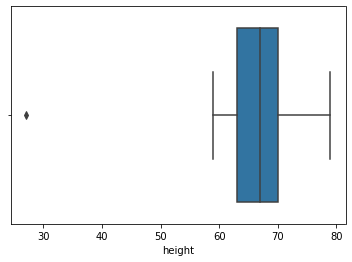

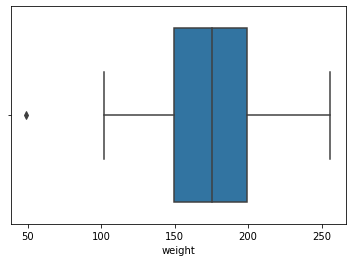

In [78]:
sns.boxplot(patients_copy['height'])
plt.show()
sns.boxplot(patients_copy['weight'])
plt.show()

In [79]:
patients_copy[patients_copy['height']>78]
# this data of height is accurate wrt its bmi

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
418,419,male,Mahmud,Kadyrov,3390 Hidden Meadow Drive,Stanton,ND,58571,United States,MahmudKadyrov@gustr.com1 701 745 2700,1980-06-18,215.2,79,24.2


In [80]:
patients_copy[patients_copy['height']<57]
# this data of height is in-accurate wrt its bmi

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,1928-02-18,192.3,27,26.1


In [81]:
patients_copy[patients_copy['weight']<100]
# this data of wieght is in-accurate wrt its bmi

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691,United States,330-202-2145CamillaZaitseva@superrito.com,1938-11-26,48.8,63,19.1


#### `Solution`: The bmi is correctly calculated in the other scenarios, thus these two height and weight are in-accurate data and can be deduced back from their bmis.
#### Code

In [82]:
patients_copy.at[4,'height']=round(math.sqrt((patients_copy.at[4,'weight']*703)/patients_copy.at[4,'bmi']),1)

In [83]:
patients_copy.at[210,'weight']=(round(patients_copy.at[210,'bmi']*(patients_copy.at[210,'height']**2)/703,1))

#### Test

In [84]:
patients_copy[patients_copy['patient_id']==211]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691,United States,330-202-2145CamillaZaitseva@superrito.com,1938-11-26,107.8,63,19.1


In [85]:
patients_copy[patients_copy['patient_id']==5]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,1928-02-18,192.3,72,26.1


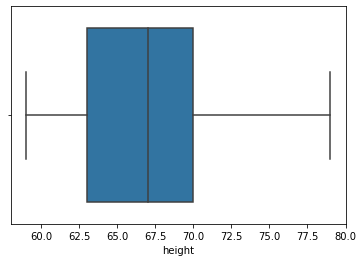

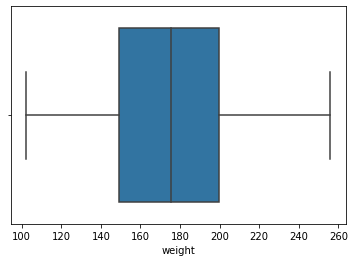

In [86]:
sns.boxplot(patients_copy['height'])
plt.show()
sns.boxplot(patients_copy['weight'])
plt.show()

### Define: Inconsistent way of storing phone numbers and email_ids in contact column
`Solution`: Create separate columns for email_id and phone numbers and minimise incosistency in their format
#### Code

In [87]:
patients_copy['email_id']=patients_copy.contact.str.extract(pat = '([a-z,A-Z,@,.]+)',expand=False)
patients_copy['email_id']=patients_copy['email_id'].str.lower()

def phone_num(a):
    try:
        num='-'.join(re.findall(r'\d{3}',a)[:-1]+re.findall(r'\d{4}',a))
        if num=='':
            return(np.nan)
        return(num)
    except:
        return(np.nan)
    
patients_copy['phone_number']=patients_copy['contact'].apply(phone_num)

patients_copy.drop(columns={'contact'},inplace=True)

#### Test

In [88]:
patients_copy.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
138,139,male,Jose,Combs,718 Eden Drive,Richmond,VA,23220,United States,1975-12-27,171.2,74,22.0,josercombs@rhyta.com,804-908-1436
468,469,male,Tosh,Jensen,1536 John Daniel Drive,Argyle,MO,65001,United States,1969-12-19,194.7,68,29.6,toshcjensen@superrito.com,573-728-3861
321,322,female,Dalmacia,Madrid,4784 Paul Wayne Haggerty Road,New Orleans,LA,70112,United States,1960-02-02,118.4,68,18.0,dalmaciamadridvalenzuela@einrot.com,504-403-4615
168,169,female,Galit,Casárez,513 Duck Creek Road,Palo Alto,CA,94306,United States,1956-05-12,118.8,67,18.6,galitcasarezbrito@jourrapide.com,650-849-6900
408,409,female,Giovana,Rocha,3542 Robinson Court,Grayling,MI,49738,United States,1938-05-02,113.1,67,17.7,giovanaazevedorocha@superrito.com,989-390-0285


### Define: Duplicate and not useful data in dataset
`Solution`: drop these duplicated rows
#### Code

In [89]:
patients_copy[patients_copy.duplicated(subset=['given_name','surname'])]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
229,230,male,John,Doe,123 Main Street,NY,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,123-456-1234-5678
237,238,male,John,Doe,123 Main Street,NY,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,123-456-1234-5678
244,245,male,John,Doe,123 Main Street,NY,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,123-456-1234-5678
251,252,male,John,Doe,123 Main Street,NY,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,123-456-1234-5678
277,278,male,John,Doe,123 Main Street,NY,NY,12345,United States,1975-01-01,180.0,72,24.4,johndoe@email.com,123-456-1234-5678


In [90]:
patients_copy.drop_duplicates(subset=['given_name','surname'],inplace=True)

#### Test

In [91]:
patients_copy[patients_copy.duplicated(subset=['given_name','surname'])]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number


## b. Treatments Dataframe

###  Define: Only 280 rows are there, instead of 350
`Solution`: We have another DataFrame treatment_cut which contains the missing 70 columns. We will have to append it this dataframe.
#### Code

In [92]:
treatment_copy=pd.concat([treatment_copy,treatment_cut_copy],ignore_index=True)

#### Test

In [93]:
treatment_copy

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN


###  Define: hba1c_change col has missing values
`Solution`: Subtract hba1c_start from hba1c_end to get hba1c_change
#### Code

In [94]:
treatment_copy['hba1c_change']=treatment_copy['hba1c_start']-treatment_copy['hba1c_end']

#### Test

In [95]:
treatment_copy.info()
treatment_copy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
given_name      350 non-null object
surname         350 non-null object
auralin         350 non-null object
novodra         350 non-null object
hba1c_start     350 non-null float64
hba1c_end       350 non-null float64
hba1c_change    350 non-null float64
dtypes: float64(3), object(4)
memory usage: 19.3+ KB


,hba1c_start,hba1c_end,hba1c_change
count,350.000000,350.000000,350.000000
mean,7.956343,7.560057,0.396286
std,0.545328,0.545456,0.059283
min,7.500000,7.010000,0.200000
25%,7.650000,7.270000,0.350000
50%,7.785000,7.400000,0.390000
75%,7.950000,7.557500,0.440000
max,9.950000,9.580000,0.540000


#### Define:  Novodra and Aurolin occupies separate columns representing 3 different data with 'u' suffux
`Solution`: Create a new column named treatment for the type of medicine prescribed using the melt function, and two columns for lower and upper doasge.
#### Code

In [96]:
treatment_copy=pd.melt(treatment_copy, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           var_name='treatment', value_name='dose')
treatment_copy=treatment_copy[treatment_copy['dose']!='-']
treatment_copy['lower_dosage'],treatment_copy['upper_dosage']=treatment_copy['dose'].str.split('-').str
treatment_copy.drop(columns={'dose'},inplace=True)

treatment_copy['lower_dosage']=pd.to_numeric(treatment_copy.lower_dosage.str.extract(pat = '([0-9].)',expand=False))
treatment_copy['upper_dosage']=pd.to_numeric(treatment_copy.upper_dosage.str.extract(pat = '([0-9].)',expand=False))

#### Test

In [97]:
treatment_copy.sample(5)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,lower_dosage,upper_dosage
399,jackson,addison,7.99,7.51,0.48,novodra,42,42
233,arne,jørgensen,9.65,9.31,0.34,auralin,32,43
64,cumelén,miramontes,7.71,7.33,0.38,auralin,24,32
535,leah,wong,7.79,7.42,0.37,novodra,28,31
90,karen,jakobsen,7.59,7.25,0.34,auralin,34,42


### Define: Incorrect data type for auralin and novadra cols
`Solution`: Change Data type from object to Category
#### Code

In [98]:
treatment_copy['treatment']=treatment_copy['treatment'].astype('category')

#### Test

In [99]:
treatment_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 698
Data columns (total 8 columns):
given_name      350 non-null object
surname         350 non-null object
hba1c_start     350 non-null float64
hba1c_end       350 non-null float64
hba1c_change    350 non-null float64
treatment       350 non-null category
lower_dosage    350 non-null int64
upper_dosage    350 non-null int64
dtypes: category(1), float64(3), int64(2), object(2)
memory usage: 22.3+ KB


### Define: Name and surname col is in lower case
`Solution`: Initcap them
#### Code

In [100]:
treatment_copy['given_name']=treatment_copy['given_name'].str.title()
treatment_copy['surname']=treatment_copy['surname'].str.title()

#### Test

In [101]:
treatment_copy.sample(5)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,lower_dosage,upper_dosage
663,Meaza,Brhane,7.70,7.36,0.34,novodra,37,41
85,Nilton,Quintanilla,7.86,7.48,0.38,auralin,42,49
316,Chibuzo,Okoli,7.64,7.29,0.35,auralin,28,33
532,Kajsa,Eidem,7.77,7.34,0.43,novodra,41,38
229,Sandra,Taylor,7.84,7.49,0.35,auralin,51,58


## c. Adverse Dataframe

### Define: Name and surname col is in lower case
`Solution`: Initcap them
#### Code

In [102]:
adverse_copy['given_name']=adverse_copy['given_name'].str.title()
adverse_copy['surname']=adverse_copy['surname'].str.title()

#### Test

In [103]:
adverse_copy.sample(5)

,given_name,surname,adverse_reaction
12,Abdul-Nur,Isa,hypoglycemia
4,Manouck,Wubbels,throat irritation
19,Finley,Chandler,headache
6,Louise,Johnson,hypoglycemia
16,Jakob,Jakobsen,hypoglycemia


### Define: No Point in making new Dataframe Adverse when a single column can be used in Treatment to represent the same data
`Solution`: Merge the adverse table to the treatment table
#### Code

In [104]:
treatment_copy=treatment_copy.merge(adverse_copy,on=['given_name','surname'],how='outer')

#### Test

In [105]:
treatment_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 9 columns):
given_name          350 non-null object
surname             350 non-null object
hba1c_start         350 non-null float64
hba1c_end           350 non-null float64
hba1c_change        350 non-null float64
treatment           350 non-null category
lower_dosage        350 non-null int64
upper_dosage        350 non-null int64
adverse_reaction    35 non-null object
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 25.0+ KB


In [106]:
treatment_copy.sample(5)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,lower_dosage,upper_dosage,adverse_reaction
56,Zikoranaudodimma,Chinedum,8.19,7.83,0.36,auralin,41,51,NaN
47,Idalia,Moore,8.34,7.90,0.44,auralin,25,31,hypoglycemia
343,Borna,Šlezinger,7.55,7.18,0.37,novodra,42,41,NaN
288,Daud,Batukayev,7.98,7.51,0.47,novodra,37,30,NaN
85,Justyna,Kowalczyk,9.84,9.44,0.40,auralin,24,34,NaN


# Your cleaned data

In [142]:
patients_copy.sample(10)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email_id,phone_number
197,198,male,Thể,Lương,2403 Ripple Street,Gaylord,MI,49735,United States,1967-11-15,223.1,70,32.0,luongkhacthe@dayrep.com,989-705-7690
47,48,female,Ana,Correia,1495 Post Farm Road,Atlanta,GA,30337,United States,1962-11-04,186.6,65,31.0,anasousacorreia@rhyta.com,404-289-1766
404,405,female,Aaliyah,Rice,4237 Hamilton Drive,Texas City,TX,77591,United States,1936-07-14,123.0,65,20.5,aaliyahrice@dayrep.com,409-944-6516
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,sandractaylor@dayrep.com,304-438-2648
42,43,female,Mizuki,Iwata,3434 Holt Street,West Palm Beach,FL,33409,United States,1927-06-30,199.1,61,37.6,mizukiiwata@gustr.com,561-357-0702
192,193,female,Jade,Parker,2957 Feathers Hooves Drive,Garden City,NY,11530,United States,1927-06-19,188.8,63,33.4,jadeparker@superrito.com,631-704-6487
382,383,male,Diðrik,Maríasson,4015 Juniper Drive,Mount Pleasant,MI,48858,United States,1949-03-25,149.6,71,20.9,dirikmariasson@jourrapide.com,989-822-1351
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,jakobcjakobsen@einrot.com,845-858-7707
290,291,female,Una,Traustadóttir,1027 Tenmile Road,Bedford,MA,01730,United States,1930-02-01,152.3,59,30.8,unatraustadottir@armyspy.com,781-739-0244
455,456,female,Hui,Ch'eng,3423 Burning Memory Lane,Yardley,PA,19067,United States,1982-05-03,203.1,69,30.0,huicheng@rhyta.com,215-321-9611


In [141]:
treatment_copy.sample(5)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,lower_dosage,upper_dosage,adverse_reaction
270,Monika,Lončar,9.13,8.72,0.41,novodra,49,46,hypoglycemia
224,Kwasi,Mensa,8.29,7.89,0.40,novodra,40,36,NaN
263,Kajsa,Eidem,7.77,7.34,0.43,novodra,41,38,NaN
124,Albino,Schiavone,7.56,7.15,0.41,auralin,35,43,NaN
14,Clinton,Miller,7.79,7.40,0.39,auralin,42,51,throat irritation


In [115]:
patients_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 502
Data columns (total 15 columns):
patient_id      498 non-null int64
assigned_sex    498 non-null category
given_name      498 non-null object
surname         498 non-null object
address         486 non-null object
city            486 non-null object
state           486 non-null object
zip_code        486 non-null object
country         486 non-null object
birthdate       498 non-null datetime64[ns]
weight          498 non-null float64
height          498 non-null int64
bmi             498 non-null float64
email_id        486 non-null object
phone_number    486 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 58.9+ KB


In [110]:
treatment_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 9 columns):
given_name          350 non-null object
surname             350 non-null object
hba1c_start         350 non-null float64
hba1c_end           350 non-null float64
hba1c_change        350 non-null float64
treatment           350 non-null category
lower_dosage        350 non-null int64
upper_dosage        350 non-null int64
adverse_reaction    35 non-null object
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 25.0+ KB


### What is Assessing Data?

The data analysis process consists of the following steps

1. Asking Questions
2. Data Wrangling<br><br>
    a. Gathering Data
            i.   CSV files
            ii.  APIs
            iii. Web Scraping
            iv.  Databases
    b. <b>Assessing Data</b><br>
    c. Cleaning Data<br><br>
3. Exploratory Data Analysis
4. Drawing Conclusion
5. Comunicating Results
    

### Assessing Data

In this step, the data is to be understood more deeply. Before implementing methods to clean it, you will definitely need to have a better idea about what the data is about.

### Types of Unclean Data

There are 2 kinds of unclean data

1. <u>Dirty Data</u> (Data with Quality issues):<br>
    Dirty data, also known as low quality data. Low quality data has content issues.<br>
2. <u>Messy Data</u> (Data with tidiness issues)<br>
    Messy data, also known as untidy data. Untidy data has structural issues.

### 1. Dirty Data

When the data has following kinds of issues:

1. Duplicated data
2. Missing Data
3. Corrupt Data
4. Inaccurate Data

This kind of data is known as Dirty data

### 2. Messy Data

When the data has structural issue is it known as Messy or untidy data.

Tidy data has the following properties:

1. Each variable forms a column
2. Each observation forms a row
3. Each observational unit forms a table

If a data violates any one of the above it is known as untidy data

Example:

<img src="untidy.png">

### Types of Assessment

There are 2 types of assessment styles

1. Manual - Looking through the data manually in google sheets
2. Programmatic - By using pandas functions such as info(), describe() or sample()

### Steps in Assessment

There are 2 steps involved in Assessment

1. Discover
2. Document

### Data Quality Dimensions

1. Completeness Issues
2. Validity Issues
3. Accuracy Issues
4. Consistency Issues